In [72]:
import requests
import gdown
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from dotenv import load_dotenv

load_dotenv()

True

In [3]:
DATA_PATH=os.path.join(os.getcwd(),'data')
os.makedirs(DATA_PATH,exist_ok=True)

In [4]:
SMS_URL = os.environ.get('SMS_URL')
CALLS_URL = os.environ.get('CALLS_URL')
URL_DICT = {'SMS':SMS_URL,'CALLS':CALLS_URL}

In [ ]:
for key, val in URL_DICT.items():
    try : 
        if key == 'SMS':
            URL = val
            file_name = f'sms-{str(date.today())}.xml'
            file_path = os.path.join(DATA_PATH,file_name)
            gdown.download(URL, file_path, quiet=False)    
        if key == 'CALLS':
            URL = val
            file_name = f'calls-{str(date.today())}.xml'
            file_path = os.path.join(DATA_PATH,file_name)
            gdown.download(URL, file_path, quiet=False)   
    except Exception as err: 
        print(f'key : {key}, error --> {err}')
        continue

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
from datetime import datetime

file_name = f'sms-{str(date.today())}.xml'
root_tree = ET.parse(os.path.join(DATA_PATH,file_name))  
root_sms = root_tree.getroot()

sms_data = []

def parse_epoch(ms):
    dt = datetime.fromtimestamp(ms / 1000)
    return dt.date(), dt.time(), dt.strftime("%b")


def parse_readable_date(readable_date_str):
    # Normalize common errors (e.g., Sept -> Sep)
    replacements = {"Sept": "Sep", "April": "Apr", "June": "Jun", "July": "Jul"}
    for wrong, correct in replacements.items():
        readable_date_str = readable_date_str.replace(wrong, correct)
    dt = datetime.strptime(readable_date_str, "%d %b %Y %H:%M:%S")
    return dt.date(), dt.time(), dt.strftime("%b")

# Extract SMS entries
for sms in root_sms.findall('sms'):
    address = sms.attrib.get('address')
    body = sms.attrib.get('body')
    subject = sms.attrib.get('subject')
    contact_name = sms.attrib.get('contact_name')
    
    date = int(sms.attrib.get('date'))
    date_sent = int(sms.attrib.get('date_sent'))
    readable_date = sms.attrib.get('readable_date')

    date_d, date_t, date_m = parse_epoch(date)
    sent_d, sent_t, sent_m = parse_epoch(date_sent)
    readable_d, readable_t, readable_m = parse_readable_date(readable_date)

    # Append parsed row
    sms_data.append({
        "address": address,
        "subject": subject,
        "body": body,
        "contact_name": contact_name,

        "date": date_d,
        "time": date_t,
        "month": date_m,

        "date_sent": sent_d,
        "time_sent": sent_t,
        "month_sent": sent_m,

        "readable_date": readable_date,
        "parsed_date": readable_d,
        "parsed_time": readable_t,
        "parsed_month": readable_m,
    })

# Create DataFrame
df = pd.DataFrame(sms_data)




In [35]:
df.head()

,address,subject,body,contact_name,date,time,month,date_sent,time_sent,month_sent,readable_date,parsed_date,parsed_time,parsed_month
0,JXJioSvc,null,For seamless data experience across the countr...,(Unknown),2021-06-20,19:56:35.162000,Jun,2021-06-20,19:53:02,Jun,20 Jun 2021 19:56:35,2021-06-20,19:56:35,Jun
1,57575701,null,[OnePlus]Here's the verification code to verif...,(Unknown),2021-06-20,20:07:15.740000,Jun,2021-06-20,20:07:15,Jun,20 Jun 2021 20:07:15,2021-06-20,20:07:15,Jun
2,59039211,null,<#> Your WhatsApp code: 131-989\n\nYou can als...,(Unknown),2021-06-20,22:19:29.963000,Jun,2021-06-20,22:19:12,Jun,20 Jun 2021 22:19:29,2021-06-20,22:19:29,Jun
3,57273200,null,<#> Your WhatsApp code: 430-720\n\nYou can als...,(Unknown),2021-06-20,22:37:13.825000,Jun,2021-06-20,22:37:11,Jun,20 Jun 2021 22:37:13,2021-06-20,22:37:13,Jun
4,JKSBGMBS,null,Activation code for Yono Lite SBI is 42550106 ...,(Unknown),2021-06-21,01:45:26.449000,Jun,2021-06-21,01:45:24,Jun,21 Jun 2021 01:45:26,2021-06-21,01:45:26,Jun


In [11]:
df.shape

(25238, 14)

In [14]:
df.sort_values('date',ascending=False)

,address,subject,body,contact_name,date,time,month,date_sent,time_sent,month_sent,readable_date,parsed_date,parsed_time,parsed_month
25237,JM-HSBCIN,proto:CjoKImNvbS5nb29nbGUuYW5kcm9pZC5hcHBzLm1l...,Your HSBC credit card xxxxx1330 is used at swi...,(Unknown),2025-05-04,17:55:09.846000,May,2025-05-04,17:55:06,May,4 May 2025 17:55:09,2025-05-04,17:55:09,May
25236,JM-HSBCIN,proto:CjoKImNvbS5nb29nbGUuYW5kcm9pZC5hcHBzLm1l...,Use 710664 as your OTP (Ref: UQHB) for TXN on ...,(Unknown),2025-05-04,17:54:50.397000,May,2025-05-04,17:54:47,May,4 May 2025 17:54:50,2025-05-04,17:54:50,May
25235,BX-SWIGGY,proto:CjoKImNvbS5nb29nbGUuYW5kcm9pZC5hcHBzLm1l...,Your payment for Swiggy order #205330964101004...,(Unknown),2025-05-04,17:53:04.320000,May,2025-05-04,17:53:03,May,4 May 2025 17:53:04,2025-05-04,17:53:04,May
25234,JM-HSBCIN,proto:CjoKImNvbS5nb29nbGUuYW5kcm9pZC5hcHBzLm1l...,Use 096046 as your OTP (Ref: VPWR) for TXN on ...,(Unknown),2025-05-04,17:52:58.185000,May,2025-05-04,17:52:55,May,4 May 2025 17:52:58,2025-05-04,17:52:58,May
25233,VM-INDUSB,proto:CjoKImNvbS5nb29nbGUuYW5kcm9pZC5hcHBzLm1l...,"Dear Md Tausif, Access to funds is available o...",(Unknown),2025-05-04,15:09:06.941000,May,2025-05-04,15:09:05,May,4 May 2025 15:09:06,2025-05-04,15:09:06,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,BXPHRMSY,null,DOUBLE DEAL: Get FLAT 30% OFF + Rs.150 instant...,(Unknown),2021-06-21,10:59:48.581000,Jun,2021-06-21,10:54:40,Jun,21 Jun 2021 10:59:48,2021-06-21,10:59:48,Jun
2,59039211,null,<#> Your WhatsApp code: 131-989\n\nYou can als...,(Unknown),2021-06-20,22:19:29.963000,Jun,2021-06-20,22:19:12,Jun,20 Jun 2021 22:19:29,2021-06-20,22:19:29,Jun
1,57575701,null,[OnePlus]Here's the verification code to verif...,(Unknown),2021-06-20,20:07:15.740000,Jun,2021-06-20,20:07:15,Jun,20 Jun 2021 20:07:15,2021-06-20,20:07:15,Jun
3,57273200,null,<#> Your WhatsApp code: 430-720\n\nYou can als...,(Unknown),2021-06-20,22:37:13.825000,Jun,2021-06-20,22:37:11,Jun,20 Jun 2021 22:37:13,2021-06-20,22:37:13,Jun


In [12]:
df['contact_name'].value_counts()

contact_name
(Unknown)                      24689
P Bhaiya jio                      81
Akhand Paapi 1                    58
Perpendicular Bro                 49
Saigal 3                          27
                               ...  
sajid jio                          1
Shahid New                         1
b idea                             1
B jio                              1
Ayesha Changezi Mehez Tutor        1
Name: count, Length: 75, dtype: int64

In [30]:
df['address'].nunique()

3812

In [26]:
str(df.date.max() - df.date.min() )

'1414 days, 0:00:00'

In [29]:
365*87/100

317.55

In [28]:
1414/365

3.873972602739726

In [21]:
df.date.min()

datetime.date(2021, 6, 20)

In [16]:
df_known= df[df['contact_name']!='(Unknown)']
df_unknown = df[df['contact_name']=='(Unknown)']


In [17]:
df_known.head()

,address,subject,body,contact_name,date,time,month,date_sent,time_sent,month_sent,readable_date,parsed_date,parsed_time,parsed_month
42,+919973183477,null,"Make your life easier with Paytm! Send Money, ...",Molvi Saheb,2021-06-21,18:25:49.002000,Jun,1970-01-01,05:30:00,Jan,21 Jun 2021 18:25:49,2021-06-21,18:25:49,Jun
344,+917870826764,null,"+917870826764 is now available to speak, call ...",Panna Baji Bihari,2021-07-05,11:28:17.449000,Jul,2021-07-05,11:28:16,Jul,5 Jul 2021 11:28:17,2021-07-05,11:28:17,Jul
368,+919934228244,null,"+919934228244 is now available to speak, call ...",Sabder (Bhai),2021-07-06,10:49:58.968000,Jul,2021-07-06,10:49:58,Jul,6 Jul 2021 10:49:58,2021-07-06,10:49:58,Jul
414,+917992376066,null,Bara chutiya aadmi ho yaar tm to,Akhand Paapi 3,2021-07-08,11:14:58.215000,Jul,2021-07-08,11:14:57,Jul,8 Jul 2021 11:14:58,2021-07-08,11:14:58,Jul
415,+917992376066,null,Rcv q n kr rahe ho be,Akhand Paapi 3,2021-07-08,11:15:03.230000,Jul,2021-07-08,11:15:01,Jul,8 Jul 2021 11:15:03,2021-07-08,11:15:03,Jul


In [18]:
df_known.shape

(549, 14)

In [19]:
df_known['contact_name'].value_counts()

contact_name
P Bhaiya jio                   81
Akhand Paapi 1                 58
Perpendicular Bro              49
Saigal 3                       27
Ammi jio                       26
                               ..
Shahid Bhai Airtel              1
b idea                          1
Faiyaz Sachin                   1
Pb                              1
Ayesha Changezi Mehez Tutor     1
Name: count, Length: 74, dtype: int64

### Call analyis

In [43]:
str(datetime.today().date())

'2025-05-04'

In [48]:
os.path.join(DATA_PATH,file_name)

'/Users/zeynmehezmacbook/Desktop/AladinDocs/Git-Personal/Data-science-brush-up/general-analysis/data/calls-2025-05-04.xml'

In [53]:
file_name = f'calls-{str(datetime.today().date())}.xml'
root_tree_call = ET.parse(os.path.join(DATA_PATH,file_name))  
root_call = root_tree_call.getroot()

call_data = []

for call in root_call.findall('call'):
    contact_name = call.attrib.get('contact_name')
    contact_number = call.attrib.get('number')
    duration = call.attrib.get('duration')
    call_date = int(call.attrib.get('date'))
    call_type = call.attrib.get('type')
    presentation = call.attrib.get('presentation')
    subscription_id = call.attrib.get('subscription_id')
    readable_date= call.attrib.get('readable_date')
    contact_name = call.attrib.get('contact_name')

    date_d, date_t, date_m = parse_epoch(call_date)
    readable_d, readable_t, readable_m = parse_readable_date(readable_date)

    call_data.append( { 
        
        'contact_name' : contact_name,
        'contact_number' : contact_number,
        'call_duration' : duration,
        'call_date_unix' : call_date,
        "call_date": date_d,
        "call_time": date_t,
        "call_month": date_m,
        'call_type': call_type,
        'presentation': presentation,
        'subscription_id': subscription_id,
        "readable_date": readable_date,
        "parsed_date": readable_d,
        "parsed_time": readable_t,
        "parsed_month": readable_m,
    })

df_call = pd.DataFrame(call_data)

In [58]:
df_call

,contact_name,contact_number,call_duration,call_date_unix,call_date,call_time,call_month,call_type,presentation,subscription_id,readable_date,parsed_date,parsed_time,parsed_month
0,Distress Number,112,5,1700283531381,2023-11-18,10:28:51.381000,Nov,2,1,null,18 Nov 2023 10:28:51,2023-11-18,10:28:51,Nov
1,Distress Number,112,0,1700378206611,2023-11-19,12:46:46.611000,Nov,2,1,null,19 Nov 2023 12:46:46,2023-11-19,12:46:46,Nov
2,Distress Number,112,5,1700479146777,2023-11-20,16:49:06.777000,Nov,2,1,null,20 Nov 2023 16:49:06,2023-11-20,16:49:06,Nov
3,Ammi jio,9875329450,0,1707793615938,2024-02-13,08:36:55.938000,Feb,2,1,89910273406031478756,13 Feb 2024 08:36:55,2024-02-13,08:36:55,Feb
4,Ammi jio,9875329450,0,1707793631718,2024-02-13,08:37:11.718000,Feb,2,1,89910273406031478756,13 Feb 2024 08:37:11,2024-02-13,08:37:11,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582,Tetiya Rashid,+918777058007,157,1746339996715,2025-05-04,11:56:36.715000,May,2,1,1,4 May 2025 11:56:36,2025-05-04,11:56:36,May
2583,(Unknown),+911246452835,0,1746344447849,2025-05-04,13:10:47.849000,May,3,1,2,4 May 2025 13:10:47,2025-05-04,13:10:47,May
2584,(Unknown),+911246452835,259,1746345279382,2025-05-04,13:24:39.382000,May,1,1,2,4 May 2025 13:24:39,2025-05-04,13:24:39,May
2585,Ammi jio,+919875329450,66,1746347165570,2025-05-04,13:56:05.570000,May,2,1,1,4 May 2025 13:56:05,2025-05-04,13:56:05,May


In [74]:
df_call.call_date.max()

datetime.date(2025, 5, 4)

In [75]:
df_call.call_date.min()

datetime.date(2023, 11, 18)

In [76]:
df_call.call_date.max() - df_call.call_date.min()

datetime.timedelta(days=533)

In [62]:
df_call['call_duration'] = df_call['call_duration'].astype(int)

In [61]:
df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   contact_name     2587 non-null   object
 1   contact_number   2587 non-null   object
 2   call_duration    2587 non-null   object
 3   call_date_unix   2587 non-null   int64 
 4   call_date        2587 non-null   object
 5   call_time        2587 non-null   object
 6   call_month       2587 non-null   object
 7   call_type        2587 non-null   object
 8   presentation     2587 non-null   object
 9   subscription_id  2587 non-null   object
 10  readable_date    2587 non-null   object
 11  parsed_date      2587 non-null   object
 12  parsed_time      2587 non-null   object
 13  parsed_month     2587 non-null   object
dtypes: int64(1), object(13)
memory usage: 283.1+ KB


In [63]:
df_call['contact_name'].value_counts()

contact_name
(Unknown)            756
Ammi jio             325
P Bhaiya jio         277
Tetiya Rashid        111
Perpendicular Bro    101
                    ... 
Asrar Bhai             1
customer care          1
Rahul Kotak            1
Aisha Phua             1
Awal New 2             1
Name: count, Length: 81, dtype: int64

In [81]:
def assign_time_schedule(time_obj):
    hour = time_obj.hour
    if 4 <= hour < 8:
        return "Early Morning(4am-8am)"
    elif 8 <= hour < 12:
        return "Morning(8am-12pm)"
    elif 12 <= hour < 14:
        return "Mid Day(12pm-2pm)"
    elif 14 <= hour < 18:
        return "Day(2pm-6pm)"
    elif 18 <= hour < 20:
        return "Evening(6pm-8pm)"
    elif 20<= hour < 22:
        return "Night(8pm-10pm)"
    else:
        return "Late Night(after 10pm)"

df_call['call_time_schedule'] = df_call['parsed_time'].apply(assign_time_schedule)


/var/folders/cd/0xwqxqbn22gdpcvtvsgqbzg00000gn/T/ipykernel_22132/3999671897.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=schedule_counts.index, y=schedule_counts.values, palette='Set2')


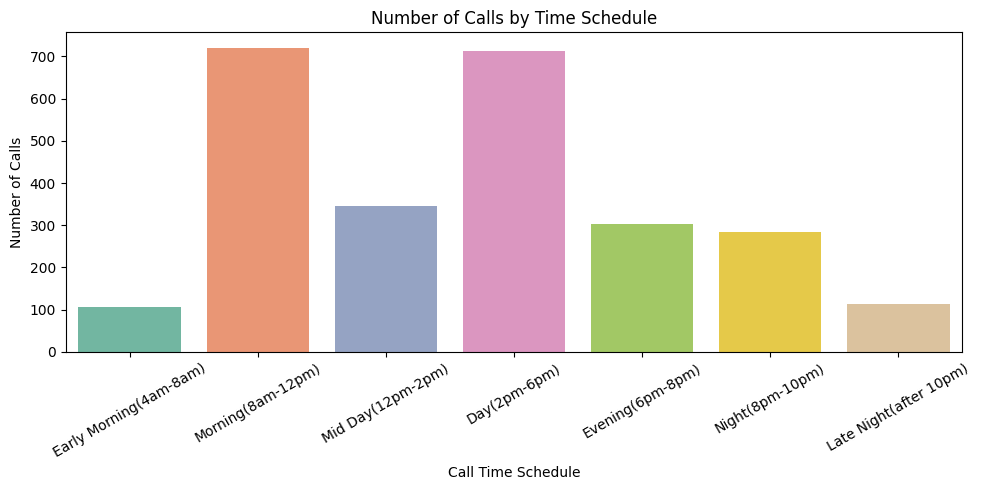

In [82]:

schedule_order = ["Early Morning(4am-8am)", "Morning(8am-12pm)", "Mid Day(12pm-2pm)", "Day(2pm-6pm)", "Evening(6pm-8pm)", "Night(8pm-10pm)","Late Night(after 10pm)"]

schedule_counts = df_call['call_time_schedule'].value_counts().reindex(schedule_order)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=schedule_counts.index, y=schedule_counts.values, palette='Set2')

plt.title("Number of Calls by Time Schedule")
plt.xlabel("Call Time Schedule")
plt.ylabel("Number of Calls")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [67]:
call_time_analysis = df_call.groupby('contact_name').agg({'call_duration':'sum'}).reset_index().rename({'call_duration':'total_call_duration'},axis=1)
call_time_analysis

,contact_name,total_call_duration
0,(Unknown),35417
1,Abhishek Sahtha Mitti,350
2,Aisha Phua,56
3,Akhand Paapi 1,0
4,Akhand Paapi 3,0
...,...,...
76,crompton lalganj,571
77,customer care,358
78,prem chopra postman,38
79,rajesh majhi,0


<Axes: >

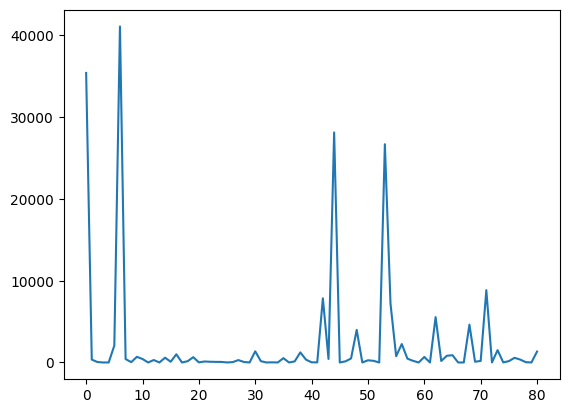

In [70]:
call_time_analysis['total_call_duration'].plot()

/var/folders/cd/0xwqxqbn22gdpcvtvsgqbzg00000gn/T/ipykernel_22132/3734189382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


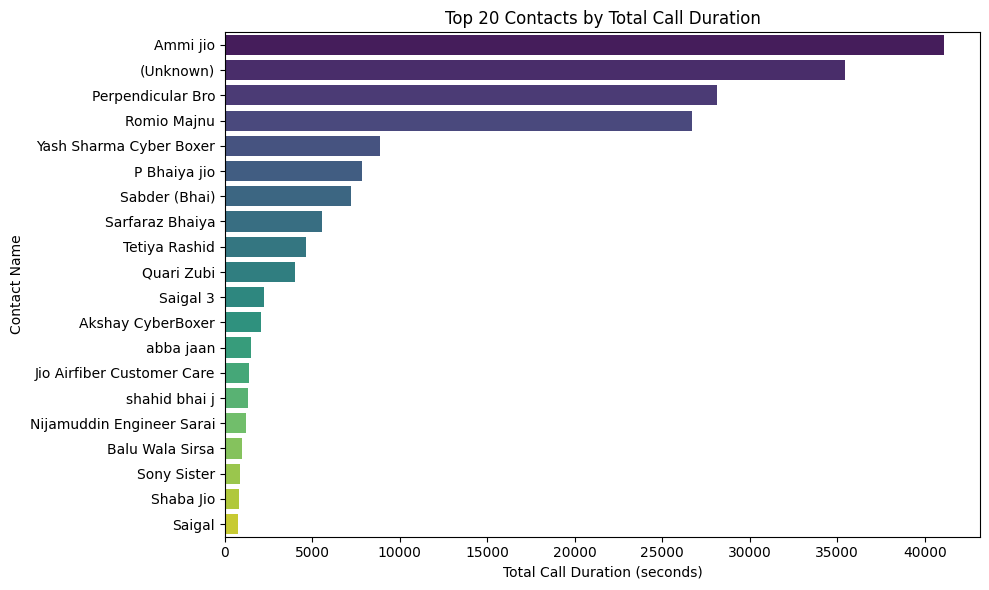

In [73]:
df_sorted = call_time_analysis.sort_values(by='total_call_duration', ascending=False)

top_df = df_sorted.head(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_df,
    y='contact_name',
    x='total_call_duration',
    palette='viridis'
)

plt.xlabel("Total Call Duration (seconds)")
plt.ylabel("Contact Name")
plt.title("Top 20 Contacts by Total Call Duration")
plt.tight_layout()
plt.show()

In [84]:
grouped = df_call.groupby(['call_time_schedule', 'contact_name']).size().reset_index(name='call_count')

top_contacts = grouped.sort_values(['call_time_schedule', 'call_count'], ascending=[True, False])

# For each time slot, get the top 1 (or top N if needed)
top_contact_per_schedule = top_contacts.groupby('call_time_schedule').first().reset_index()


In [85]:
top_contact_per_schedule

,call_time_schedule,contact_name,call_count
0,Day(2pm-6pm),(Unknown),309
1,Early Morning(4am-8am),Ammi jio,26
2,Evening(6pm-8pm),(Unknown),81
3,Late Night(after 10pm),P Bhaiya jio,23
4,Mid Day(12pm-2pm),(Unknown),144
5,Morning(8am-12pm),(Unknown),157
6,Night(8pm-10pm),P Bhaiya jio,44


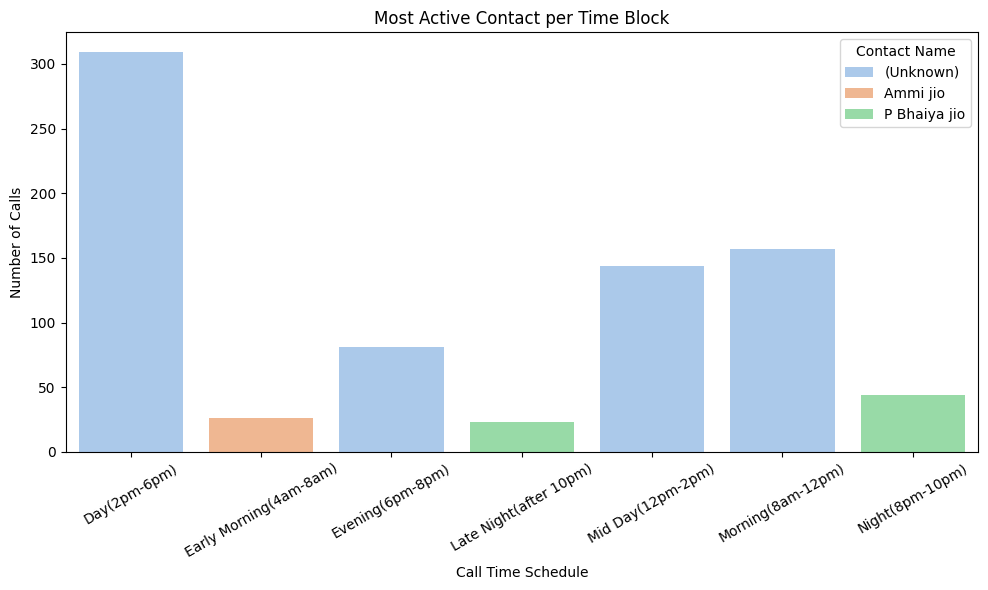

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_contact_per_schedule,
    x='call_time_schedule',
    y='call_count',
    hue='contact_name',
    dodge=False,
    palette='pastel'
)

plt.title("Most Active Contact per Time Block")
plt.xlabel("Call Time Schedule")
plt.ylabel("Number of Calls")
plt.xticks(rotation=30)
plt.legend(title='Contact Name')
plt.tight_layout()
plt.show()

/var/folders/cd/0xwqxqbn22gdpcvtvsgqbzg00000gn/T/ipykernel_22132/2307486179.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=schedule_counts.index, y=schedule_counts.values, palette='coolwarm')


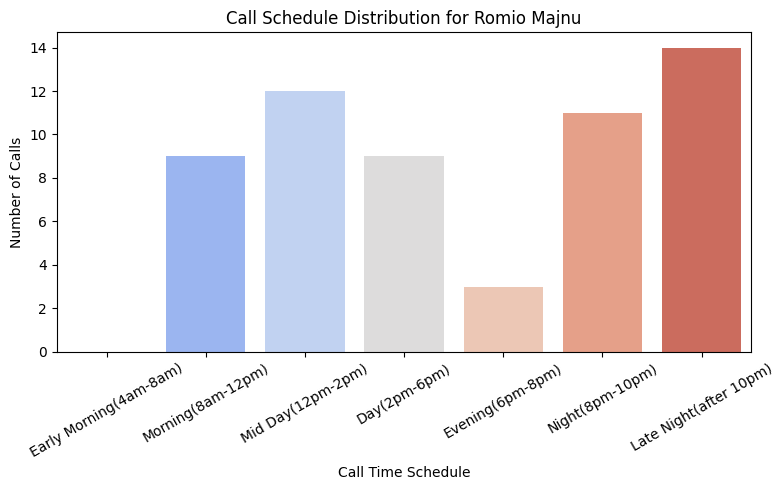

Object `instantly` not found.


In [ ]:
target_contact = "Romio Majnu"  # <-- change this

contact_df = df_call[df_call['contact_name'] == target_contact]

schedule_order = ["Early Morning(4am-8am)", "Morning(8am-12pm)", "Mid Day(12pm-2pm)", "Day(2pm-6pm)", "Evening(6pm-8pm)", "Night(8pm-10pm)","Late Night(after 10pm)"]
schedule_counts = contact_df['call_time_schedule'].value_counts().reindex(schedule_order, fill_value=0)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=schedule_counts.index, y=schedule_counts.values, palette='coolwarm')

plt.title(f"Call Schedule Distribution for {target_contact}")
plt.xlabel("Call Time Schedule")
plt.ylabel("Number of Calls")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [88]:


def plot_call_schedule_for_contact(df, contact_name):
    """
    Plot call time schedule distribution for a given contact name.
    
    Args:
        df (pd.DataFrame): DataFrame with 'contact_name' and 'call_time_schedule'.
        contact_name (str): Contact name to filter and visualize.
    """
    schedule_order = ["Early Morning(4am-8am)", "Morning(8am-12pm)", "Mid Day(12pm-2pm)", "Day(2pm-6pm)", "Evening(6pm-8pm)", "Night(8pm-10pm)","Late Night(after 10pm)"]

    # Filter for the specific contact
    contact_df = df[df['contact_name'] == contact_name]

    if contact_df.empty:
        print(f"No data found for contact: {contact_name}")
        return

    # Count time schedule frequencies
    schedule_counts = (
        contact_df['call_time_schedule']
        .value_counts()
        .reindex(schedule_order, fill_value=0)
    )

    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=schedule_counts.index, y=schedule_counts.values, palette='coolwarm')
    plt.title(f"Call Schedule Distribution for '{contact_name}'")
    plt.xlabel("Call Time Schedule")
    plt.ylabel("Number of Calls")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


/var/folders/cd/0xwqxqbn22gdpcvtvsgqbzg00000gn/T/ipykernel_22132/2626248399.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=schedule_counts.index, y=schedule_counts.values, palette='coolwarm')


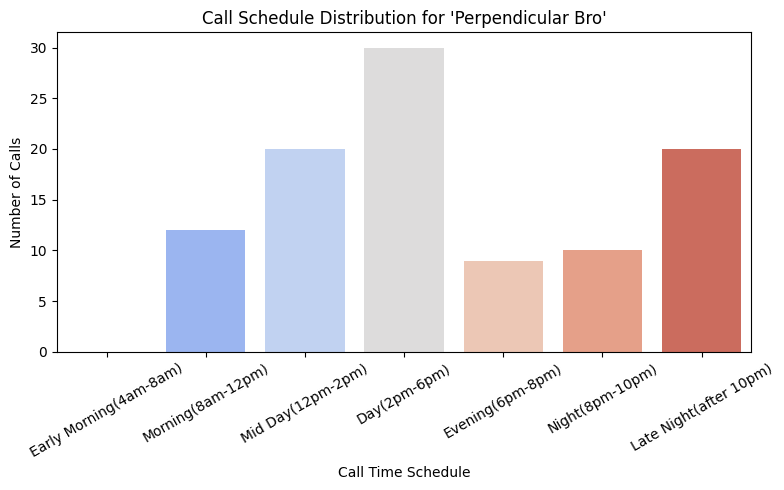

In [89]:
plot_call_schedule_for_contact(df_call,'Perpendicular Bro')

/var/folders/cd/0xwqxqbn22gdpcvtvsgqbzg00000gn/T/ipykernel_22132/2626248399.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=schedule_counts.index, y=schedule_counts.values, palette='coolwarm')


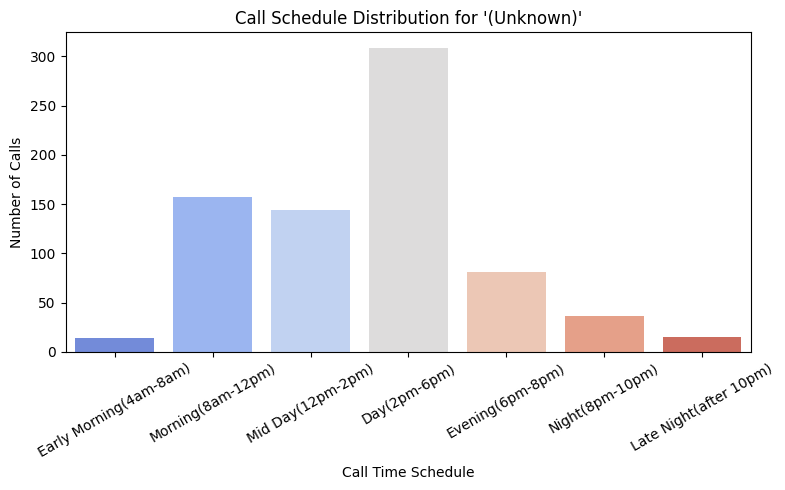

In [90]:
plot_call_schedule_for_contact(df_call,'(Unknown)')